**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Maria Fernanda Ocampo Nava
*   MATRÍCULA: A01797420

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
DIR = "/content/drive/MyDrive"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
#cargo mi archivo en un dataframe
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
#como es muy pesado como tip me comentaron hacer una copia para no tener que cargarlo de nuevo cada que modifique algo

cars_df = cars_df.copy()
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [6]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`, `lat`, `long`.


In [7]:
#Aqui lo que hago es borrar todas las columnas de DF y al poner el inplace le pido que mantenga el cambio
# por lo anterior mi df utilizado en los pasos siguientes ya no tendran esas coumnas

cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date', 'lat', 'long'], inplace=True)
cars_df

,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,state
0,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,wy
426876,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,wy
426877,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,wy
426878,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,wy


In [8]:
#observo todas las columnas que tengo y me aseguro que no esten las columnas que borre

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
dtypes: f

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [9]:
#la función shape me ayuda a obtener la tupla del número de filas y columnas
#le pedí que me trajera el elemento 1 de la tupla porque recordemos que el conteio inicia en 0
#el elemento 0 sería los renglones

numero_columnas = cars_df.shape[1]
print(numero_columnas)

18


In [10]:
numero_registros = cars_df.shape[0]
print(numero_registros)

426880


## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://www.quora.com/How-much-missing-data-is-too-much-1

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?

* Observamos que al obtener los valores faltantes de cada columna las que tenian más de 30% de valores faltantes fueron condition, cylinders, drive,size, paint_color y country por lo que en total se eliminaron 6 columnas

In [11]:
#lo primero que haré es obtener el % de valores faltantes de las columnas

missing_percentage = cars_df.isnull().sum() / len(cars_df) * 100
print("Porcentaje de valores faltantes por columna:")
print(missing_percentage)


Porcentaje de valores faltantes por columna:
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
county          100.000000
state             0.000000
dtype: float64


In [12]:

#El parámetro thresh de la función dropna() se utiliza para especificar el número mínimo de valores no nulos que deben existir en una fila para que se mantenga.
# por lo anterior creamo una variable que nos diga cuanto representa el 70% de todos los datos

thresh = len(cars_df) * 0.70

#una vez que tengo esa variable ya puedo eliminar las que no cumplen con el valor de tresh
# al poner el parametro de axis=1 le estoy indicando que se van a borrar columnas

cars_df.dropna(axis=1, thresh=thresh, inplace=True)

# pido la info de mi nuevo df para ver las variables que no fueron eliminadas
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 39.1+ MB


Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


* se eliminaron el 8.73%


In [13]:
# Obtener el % de valores faltantes por columna para ver las columnas con menos del 5% de valores faltantes
porcentaje_faltante = cars_df.isnull().sum() / len(cars_df) * 100
porcentaje_faltante


,0
region,0.000000
region_url,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
fuel,0.705819
odometer,1.030735
title_status,1.930753
transmission,0.598763


In [14]:
#identifico las columnas a eliminar
columnas = porcentaje_faltante[porcentaje_faltante < 5].index.tolist()
columnas

['region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'state']

In [15]:
# obtengo la variable en la que almacene los números de  registros originales
# esto con la intención de obtener el % de liminados
numero_registros

426880

In [16]:

# Borrar registros con NaN en las columnas seleccionadas
# con el subset le estoy indicando en que columnas eliminará los registros

cars_df.dropna(subset=columnas, inplace=True)



In [17]:

#obtengo el número de registros restantes
Registros_restantes = len(cars_df)
Registros_restantes

389604

In [18]:

# Calcular el porcentaje de registros eliminados
renglones_eliminados = ((numero_registros- Registros_restantes) / numero_registros) * 100
renglones_eliminados

8.7321964017991

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [19]:
# Identificar las columnas con valores faltantes restantes
faltantes = cars_df.isnull().sum()
cols_con_faltantes = faltantes[faltantes > 0].index.tolist()
cols_con_faltantes



['type']

In [20]:
# Imputar valores faltantes para cada columna restante
for col in cols_con_faltantes:
    if cars_df[col].dtype in ['int64', 'float64']:  # Numéricas
        # Usar la mediana para columnas numéricas (menos sensible a  outliers)
        median_value = cars_df[col].median()
        cars_df[col].fillna(median_value, inplace=True)
    else:  # Categóricas
        # Usar la moda para columnas categóricas
        mode_value = cars_df[col].mode()[0]
        cars_df[col].fillna(mode_value, inplace=True)


<ipython-input-20-529b4cde0184>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df[col].fillna(mode_value, inplace=True)


In [21]:
# Observo que ya no tengo valores faltantes
print(cars_df.isnull().sum())

region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

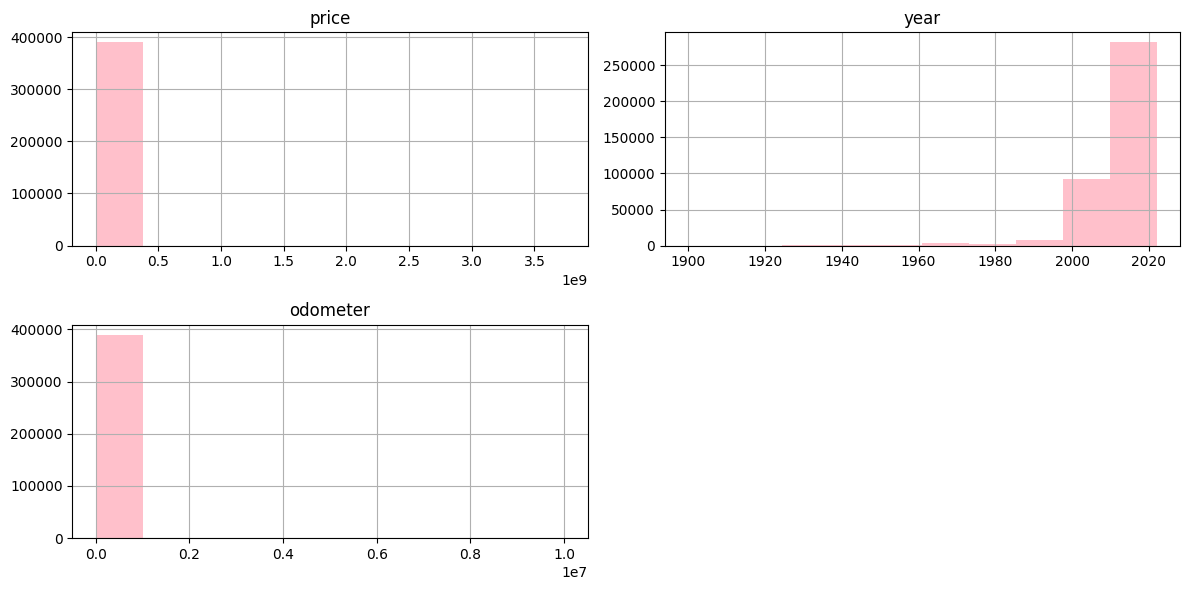

In [22]:

columnas=['price', 'year', 'odometer']

cars_df.hist(columnas, figsize=(12, 6),color='pink')
plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

In [23]:
#para calcular los años del vehiculo necesitamos una fecha o año base al que calcularemos los años que han pasado
#por lo anterior lo conveniente es poner el año actual como el año al que sacaremos la deferencia es decir cuantos  años han pasado desde el año de fabricación al actual

cars_df['age']=2025-cars_df['year']

#y elimino la columna de año de fabricacion
cars_df.drop(columns=['year'], inplace=True)



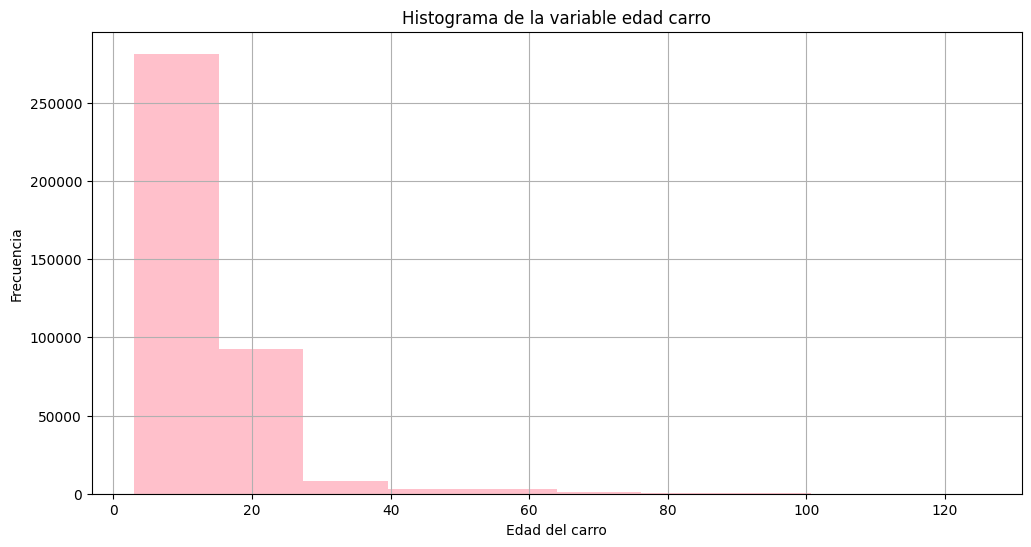

In [24]:
#ahora genero el histograma de la variable edad carro

cars_df.hist('age', figsize=(12, 6),color='pink')
plt.title('Histograma de la variable edad carro')
plt.xlabel('Edad del carro')
plt.ylabel('Frecuencia')
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

<Axes: >

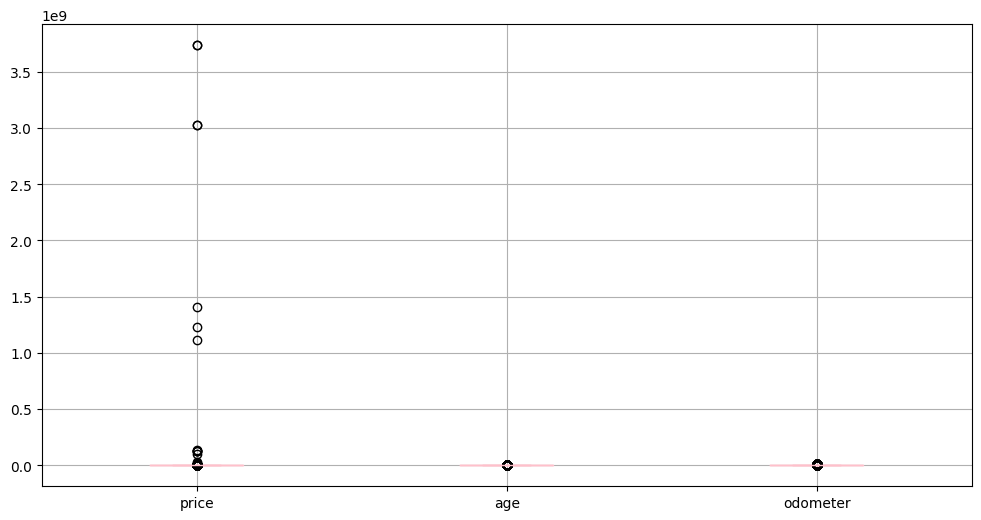

In [25]:
columnas=['price','age', 'odometer']

cars_df.boxplot(columnas, figsize=(12, 6),color='pink')





Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se han eliminado en total hasta ahora?

* Se han eliminado el 13.69%

In [26]:

outlier = ['price', 'age', 'odometer']


# calculo el % de valores atipicos por columna
print("Porcentaje de valores atípicos por columna:")

for col in outlier :
    Q1 = cars_df[col].quantile(0.25)
    Q3 = cars_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definimos loslímites para los putliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifyicamosoutliers
    outliers = cars_df[(cars_df[col] < lower_bound) | (cars_df[col] > upper_bound)]

    # Calculamoes el porcentaje de outliers del dataframe actual
    porcentaje_outliers = (len(outliers) / len(cars_df)) * 100
    print(f"  {col}: {porcentaje_outliers:.2f}%")

    #quitamos los outliers
    cars_df = cars_df[(cars_df[col] >= lower_bound) & (cars_df[col] <= upper_bound)]

# Calculate calculo el % de registros que se han eliminado del df original
registros_despues_outliers = len(cars_df)
total_registros_eliminados = ((numero_registros  - registros_despues_outliers) / numero_registros ) * 100

print(f"\nPorcentaje total de registros eliminados ): {total_registros_eliminados:.2f}%")

# Display the info of the DataFrame after outlier removal to see the new number of records
cars_df.info()

Porcentaje de valores atípicos por columna:
  price: 1.71%
  age: 3.07%
  odometer: 0.74%

Porcentaje total de registros eliminados ): 13.69%
<class 'pandas.core.frame.DataFrame'>
Index: 368433 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        368433 non-null  object 
 1   region_url    368433 non-null  object 
 2   price         368433 non-null  int64  
 3   manufacturer  368433 non-null  object 
 4   model         368433 non-null  object 
 5   fuel          368433 non-null  object 
 6   odometer      368433 non-null  float64
 7   title_status  368433 non-null  object 
 8   transmission  368433 non-null  object 
 9   type          368433 non-null  object 
 10  state         368433 non-null  object 
 11  age           368433 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 36.5+ MB


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

<Axes: >

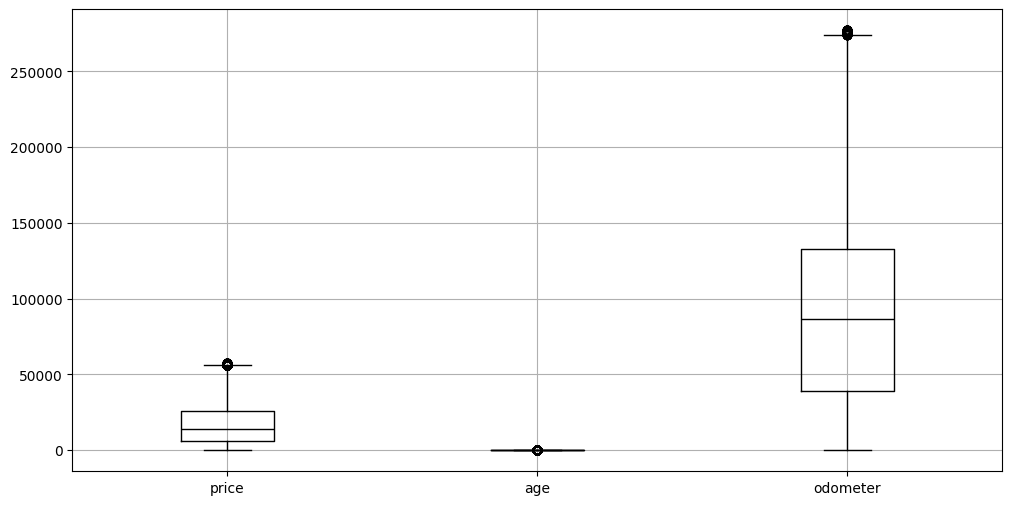

In [27]:
columnas=['price','age', 'odometer']

cars_df.boxplot(columnas, figsize=(12, 6),color='black')

In [28]:
#que el sesgo sea positivo significa que la cola de la distribución se extiende más a la derecha

cars_df['price'].skew()



np.float64(0.6840676648713381)

In [29]:
cars_df['age'].skew()

np.float64(0.8181908003442647)

In [30]:
cars_df['odometer'].skew()


np.float64(0.46502786900972204)

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


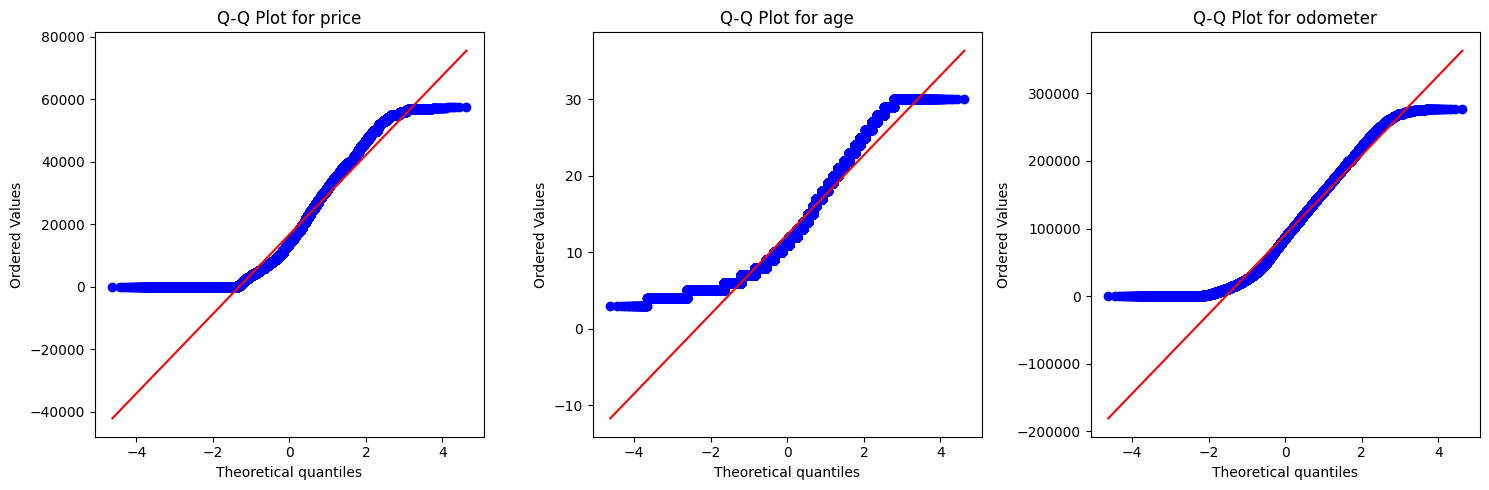

In [31]:
columnas = ['price', 'age', 'odometer']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columnas):
  # Creo un subplot para cada variable
    plt.subplot(1, len(columnas), i + 1)
    #genero el Q-Q plot frente una distribución normal
    stats.probplot(cars_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {col}')

plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

Recuerda que en `PowerTransformer()` el parámetro `standardize` por defecto es `True`. Con esto, después de hacer la transformación, el resultado se escala con *Z-score*, haciendo que la media sea 0 y la desviación estándar 1. Como en el ejercicio 6 ocuparás Min-Max para escalar, haz `standardize=False` para omitir el escalamiento en esta fase.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Coloca el resultado en un dataframe denominado `transf_df` que contenga sólo las variables transformadas.

In [32]:
from sklearn.preprocessing import PowerTransformer
columnas=['price','odometer','age']
# Inicializa el transformador Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Aplica la transformación a las columnas seleccionadas
transf_df = pd.DataFrame(pt.fit_transform(cars_df[columnas]), columns=columnas)

5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

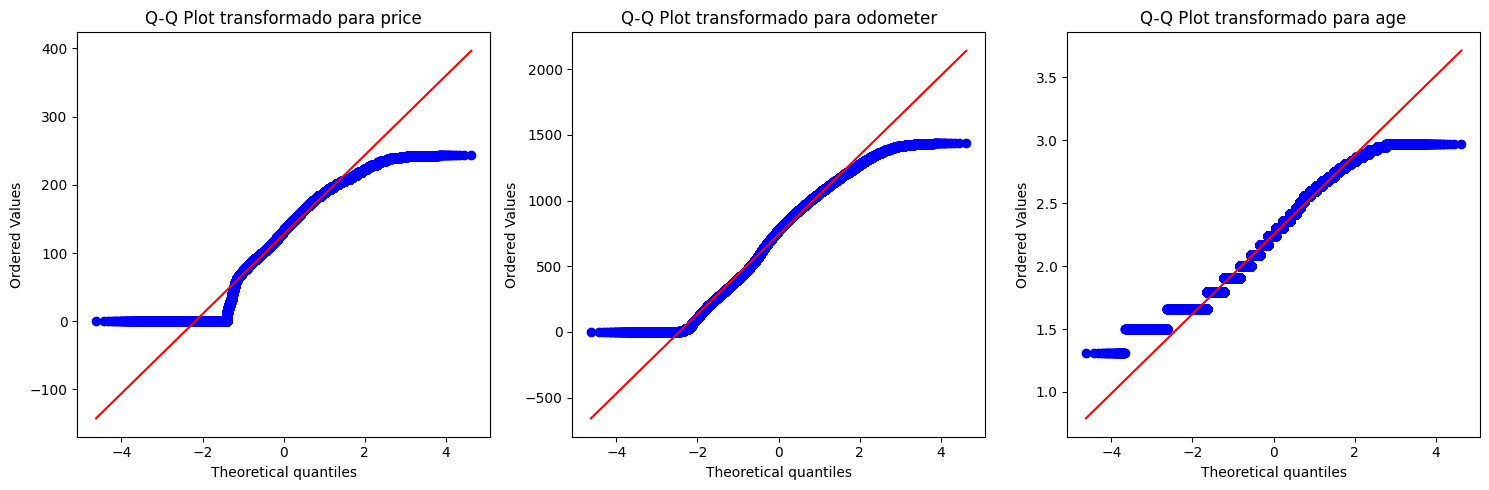

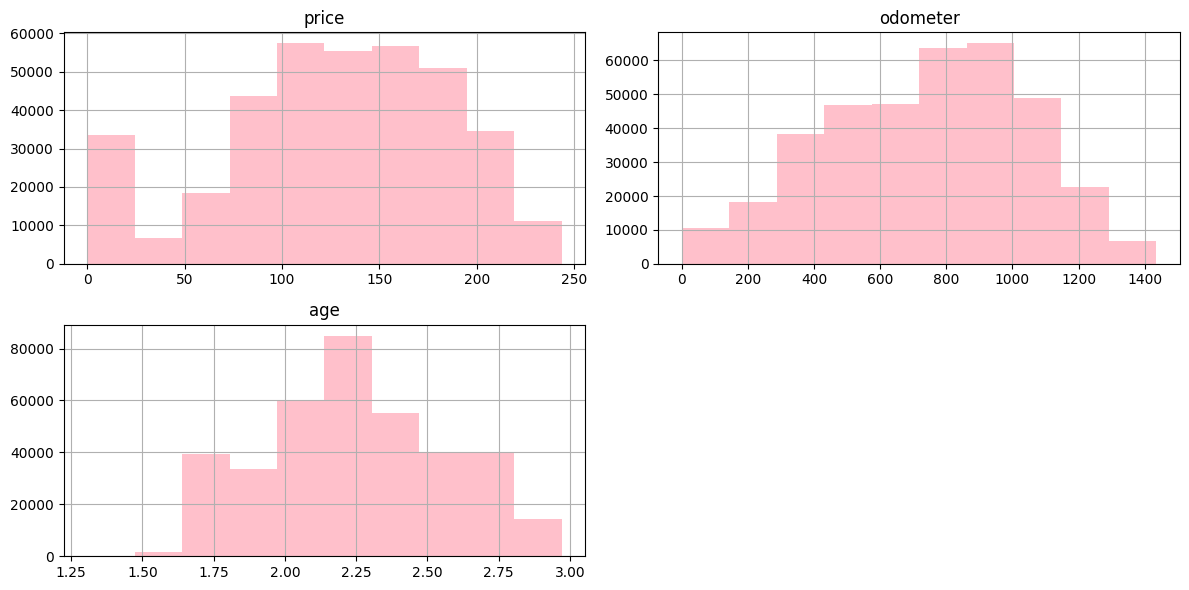

In [33]:
columnas = ['price', 'odometer','age']

plt.figure(figsize=(15, 5))

for i, col in enumerate(columnas):
    plt.subplot(1, len(columnas), i + 1)
    stats.probplot(transf_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot transformado para {col}')

plt.tight_layout()
plt.show()

# Dibujo los histogramas de las variables transformadas
transf_df.hist(columnas, figsize=(12, 6), color='pink')
plt.tight_layout()
plt.show()

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Coloca el resultado en un dataframe denominado `minmax_df`.


In [34]:
from sklearn.preprocessing import MinMaxScaler

# Inicializa el escalador Min-Max
scaler = MinMaxScaler()

# Aplica el escalamiento Min-Max a las variables transformadas
minmax_df = pd.DataFrame(scaler.fit_transform(transf_df), columns=transf_df.columns)

6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

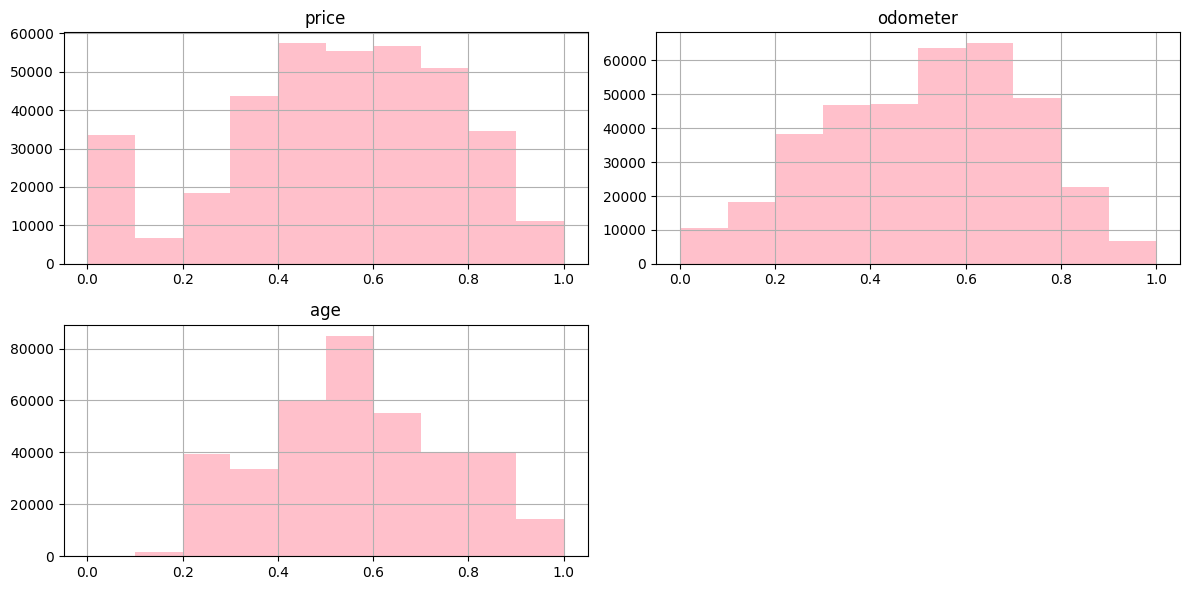

In [35]:
# Dibujo los histogramas de las variables transformadas
minmax_df.hist(columnas, figsize=(12, 6), color='pink')
plt.tight_layout()
plt.show()

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [36]:
# Selecciono las columnas no numéricas (categóricas)
categoricas = cars_df.select_dtypes(exclude=np.number).columns

# Aplica el método describe() a las columnas categóricas
cars_df[categoricas].describe().T

,count,unique,top,freq
region,368433,404,columbus,3201
region_url,368433,413,https://grandrapids.craigslist.org,2745
manufacturer,368433,40,ford,62162
model,368433,19314,f-150,7477
fuel,368433,5,gas,313944
title_status,368433,6,clean,356757
transmission,368433,3,automatic,293338
type,368433,13,sedan,155206
state,368433,51,ca,42333


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente. Una variable es considerada de alta cardinalidad cuando tiene cientos de valores únicos.

In [37]:
# Obtén el número de valores únicos para cada columna categórica
cardinalidad = cars_df[categoricas].nunique()

# Define el umbral para alta cardinalidad
umbral_alta_cardinalidad = 100  # Cientos de valores únicos

# Separa las variables en listas según su cardinalidad
highly_cardinal_variables = cardinalidad[cardinalidad >= umbral_alta_cardinalidad].index.tolist()
few_cardinal_variables = cardinalidad[cardinalidad < umbral_alta_cardinalidad].index.tolist()

print("Variables de alta cardinalidad:", highly_cardinal_variables)
print("Variables de baja cardinalidad:", few_cardinal_variables)

Variables de alta cardinalidad: ['region', 'region_url', 'model']
Variables de baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

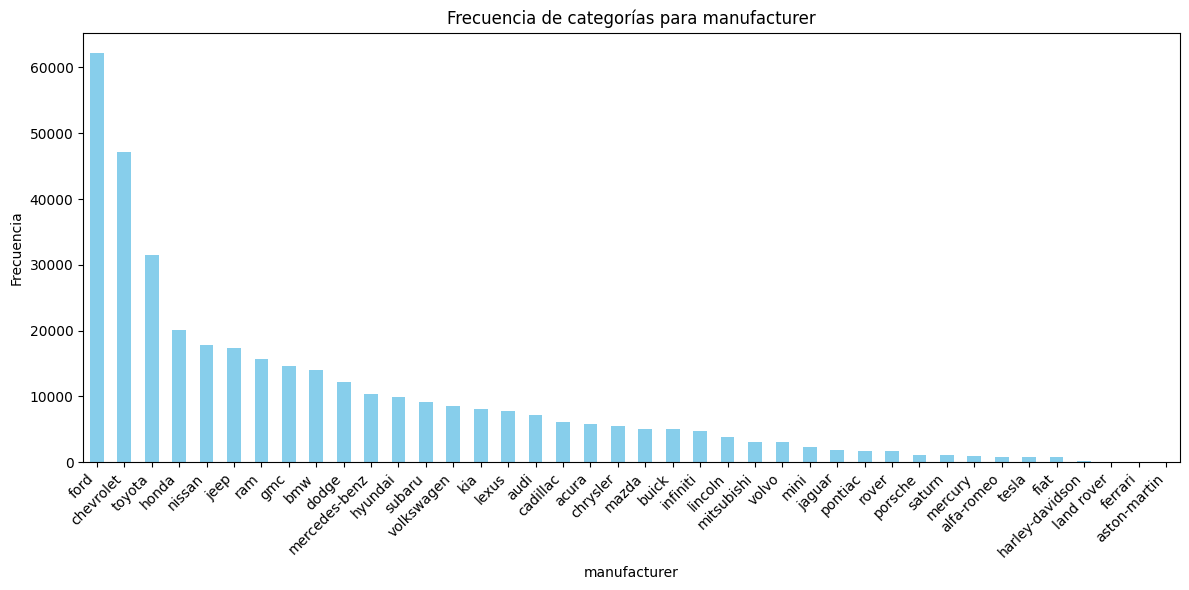

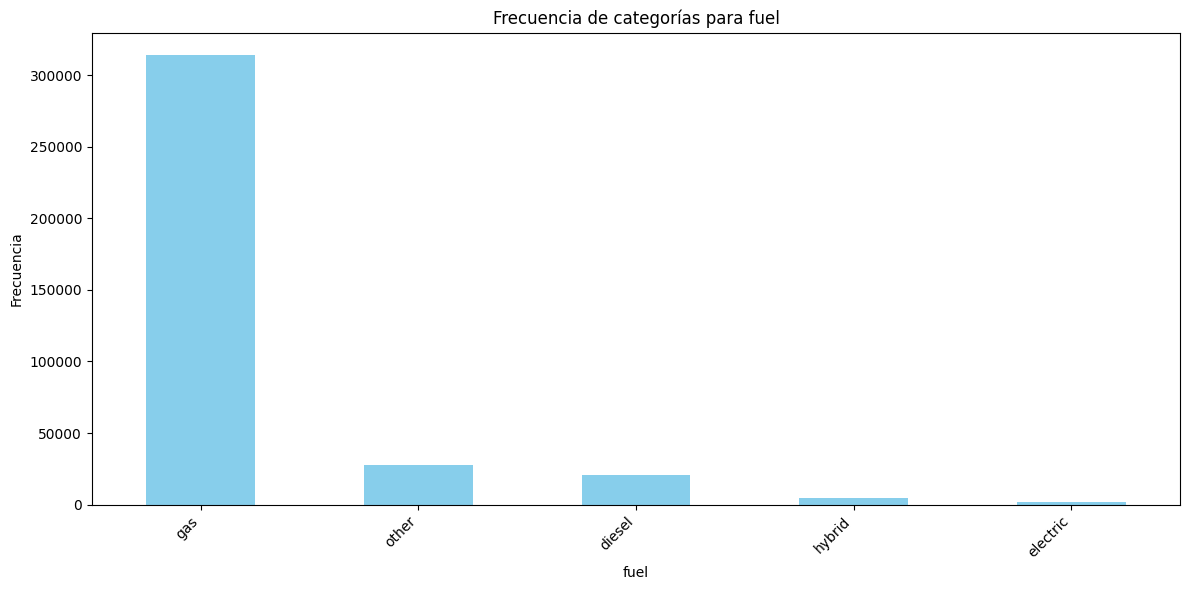

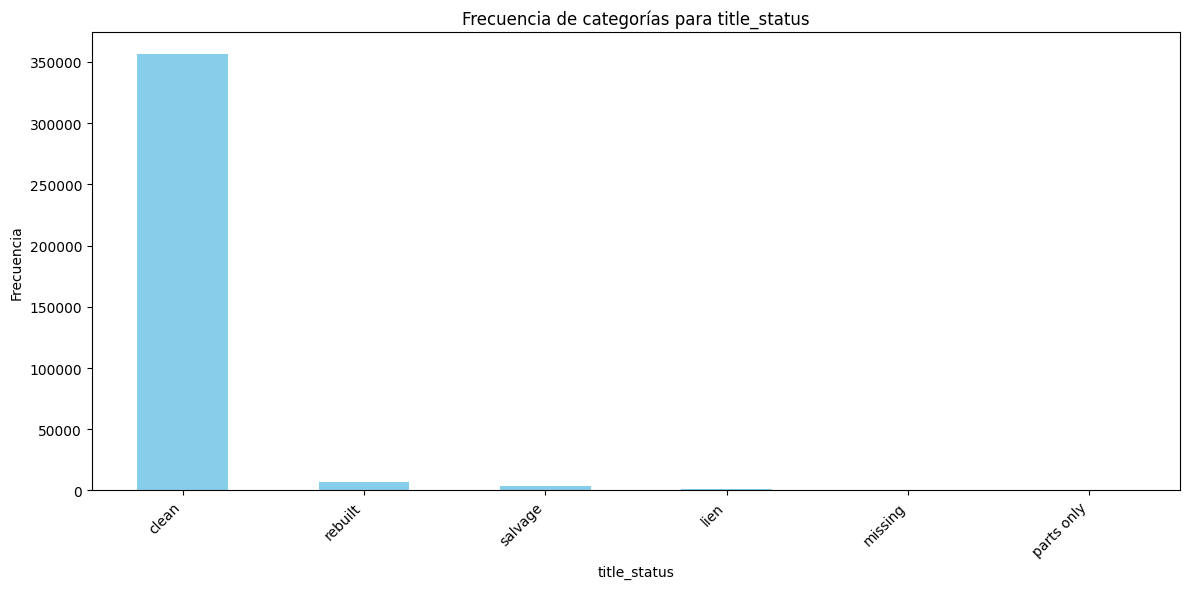

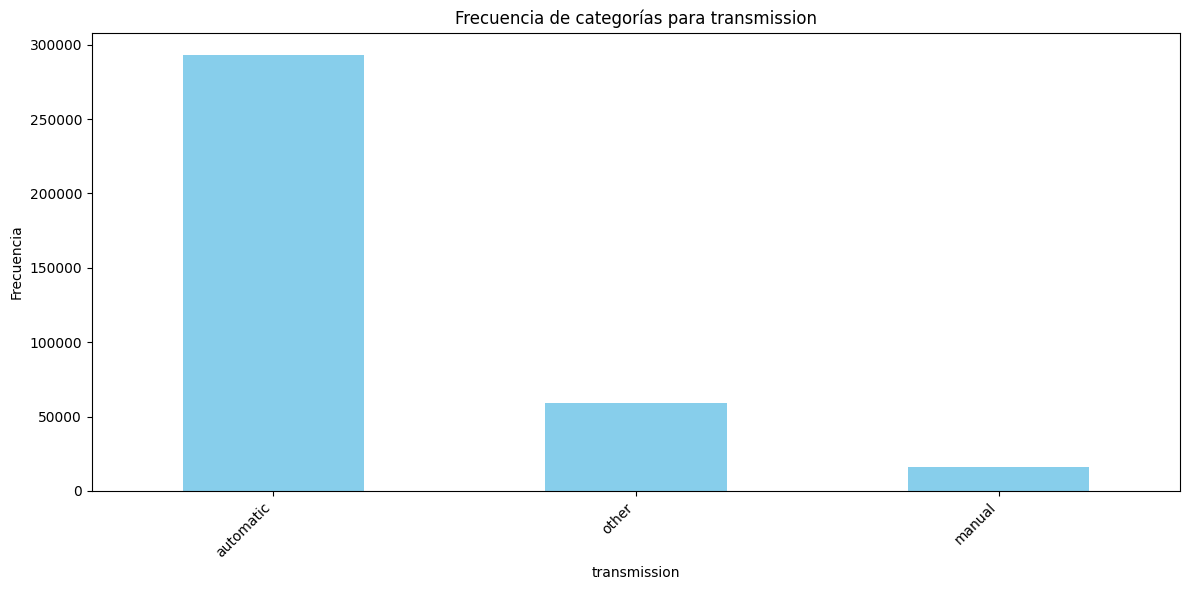

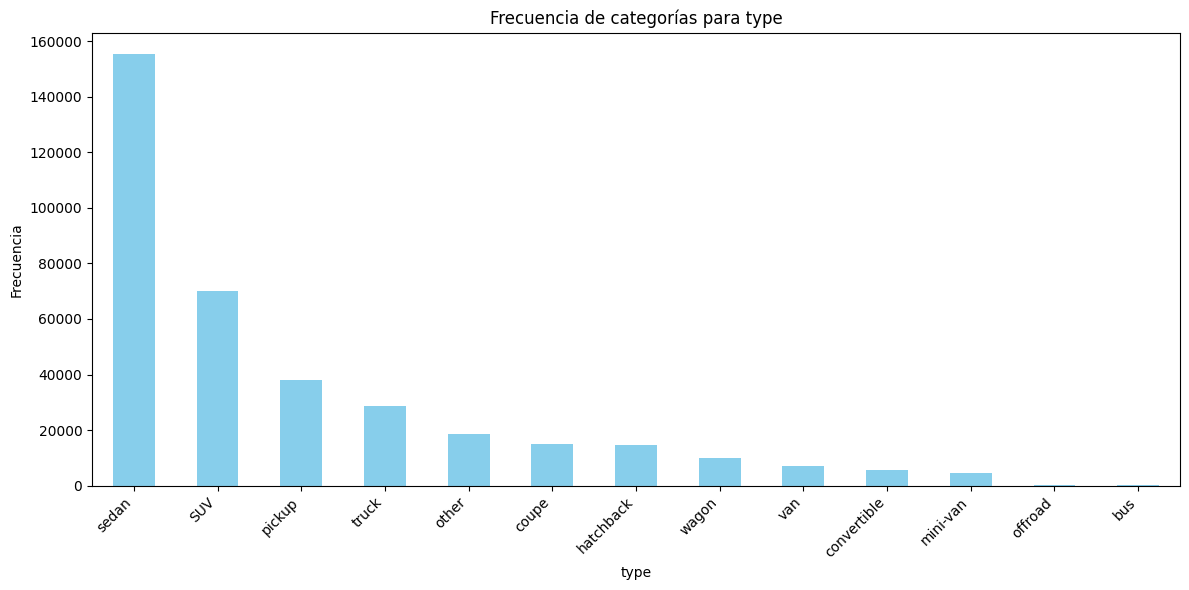

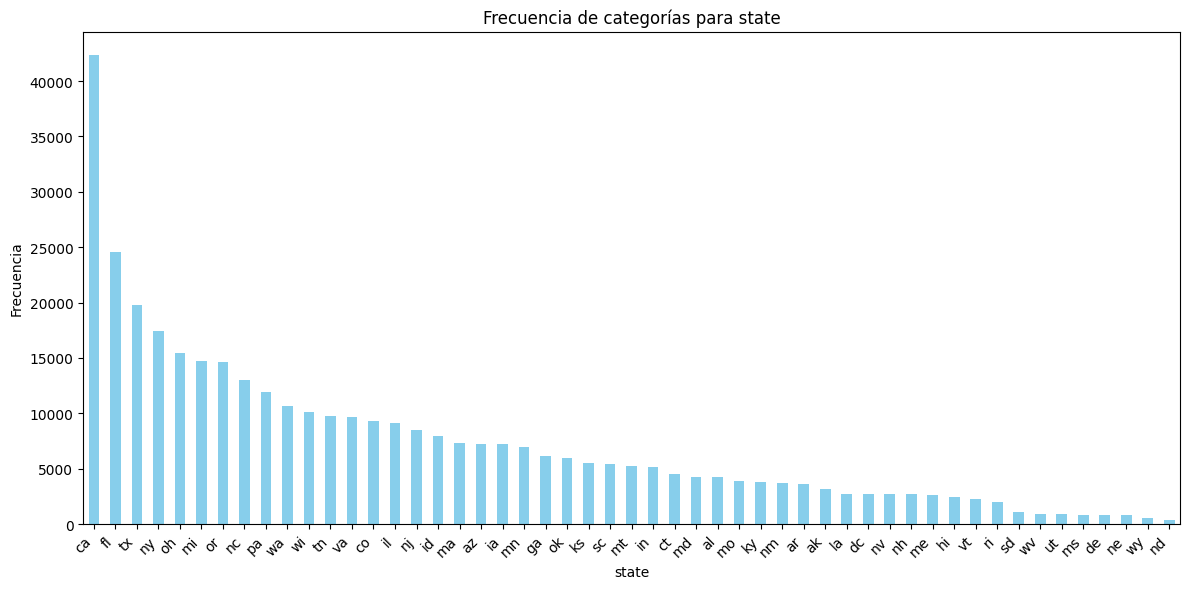

In [38]:
for col in few_cardinal_variables:
    # Crea una nueva figura y un nuevo conjunto de ejes para cada columna
    fig, ax = plt.subplots(figsize=(12, 6)) # Puedes ajustar el tamaño si es necesario

    cars_df[col].value_counts().plot(kind='bar', color='skyblue', ax=ax) # Plot on the newly created ax
    plt.title(f'Frecuencia de categorías para {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mejor legibilidad
    plt.tight_layout() # Ajusta el diseño para evitar superposiciones
    plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`, borrando la primera categoría (`drop='first'`). Coloca el resultado en un dataframe denominado `onehot_df`.

In [39]:
# AplicO codificación one-hot a las variables de baja cardinalidad
onehot_df = pd.get_dummies(cars_df[few_cardinal_variables], drop_first=True)

# MuestrO las primeras filas del dataframe resultante
print(onehot_df.head())

# Muestra la información del dataframe resultante
onehot_df.info()

    manufacturer_alfa-romeo  manufacturer_aston-martin  manufacturer_audi  \
27                    False                      False              False   
28                    False                      False              False   
29                    False                      False              False   
30                    False                      False              False   
31                    False                      False              False   

    manufacturer_bmw  manufacturer_buick  manufacturer_cadillac  \
27             False               False                  False   
28             False               False                  False   
29             False               False                  False   
30             False               False                  False   
31             False               False                  False   

    manufacturer_chevrolet  manufacturer_chrysler  manufacturer_dodge  \
27                   False                  False            

9. Aplica codificación binaria a las variables en `highly_cardinal_variables`. Coloca el resultado en un dataframe denominado `binary_df`.

In [ ]:
# AplicO codificación one-hot a las variables de ALTA cardinalidad
BINARY_df = pd.get_dummies(cars_df[highly_cardinal_variables], drop_first=True)

# MuestrO las primeras filas del dataframe resultante
print(BINARY_df.head())

# Muestra la información del dataframe resultante
BINARY_df.info()

10. Concatena los dataframes obtenidos: `minmax_df` (cuyas variables numéricas ya están transformadas y escaladas) y las codificaciones anteriores (`onehot_df` y `binary_df`). Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.